# Trending YouTube Video EDA and Visualization

The purpose of this notebook is to explore trends from the trending YouTube videos of the past 3 years and derive insights from this large batch of data. Through doing so, we will unlock a better understanding of what makes a video popular. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# read in the data
df = pd.read_csv("/kaggle/input/youtube-trending-video-dataset/US_youtube_trending_data.csv")

# define a dictionary of categories to map onto the dataframe
categories = [{'categoryId': 2, 'categoryName': 'Cars & Vehicles'},
 {'categoryId': 23, 'categoryName': 'Comedy'},
 {'categoryId': 27, 'categoryName': 'Education'},
 {'categoryId': 24, 'categoryName': 'Entertainment'},
 {'categoryId': 1, 'categoryName': 'Film & Animation'},
 {'categoryId': 20, 'categoryName': 'Gaming'},
 {'categoryId': 26, 'categoryName': 'How-to & Style'},
 {'categoryId': 10, 'categoryName': 'Music'},
 {'categoryId': 25, 'categoryName': 'News & Politics'},
 {'categoryId': 29, 'categoryName': 'Non-profits & Activism'},
 {'categoryId': 22, 'categoryName': 'People & Blogs'},
 {'categoryId': 15, 'categoryName': 'Pets & Animals'},
 {'categoryId': 28, 'categoryName': 'Science & Technology'},
 {'categoryId': 17, 'categoryName': 'Sport'},
 {'categoryId': 19, 'categoryName': 'Travel & Events'}]

dfCategories = pd.DataFrame(categories)
dataCopy = df.copy()

# merge the categories with the dataframe with the video info 
mergedData = dfCategories.merge(df, on='categoryId')

## EDA

In [3]:
# check for nulls
mergedData.isna().sum()

categoryId              0
categoryName            0
video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4154
dtype: int64

In [4]:
# drop videos with a 0 view count
mergedData = mergedData.loc[mergedData['view_count'] != 0]

In [5]:
# check what percent of videos have comments / likes disabled
commentsDisabled = len(mergedData.loc[mergedData['comments_disabled'] == True]) / len(mergedData)
likesDisabled = len(mergedData.loc[mergedData['ratings_disabled'] == True]) / len(mergedData)

print(str(round(commentsDisabled * 100, 2)) + "% of videos have comments disabled.")
print(str(round(likesDisabled * 100, 2)) + "% of videos have likes disabled.")

1.37% of videos have comments disabled.
0.55% of videos have likes disabled.


In [6]:
# create some columns to compare number of likes and comments to video views
# only include videos that have likes or comments enabled 
likesEnabled = mergedData.loc[mergedData['ratings_disabled'] == False]
commentsEnabled = mergedData.loc[mergedData['comments_disabled'] == False]

likesEnabled['likesPerView'] = likesEnabled['likes'] / likesEnabled['view_count']
commentsEnabled['commentsPerView'] = commentsEnabled['comment_count'] / commentsEnabled['view_count']

/tmp/ipykernel_20/1663987621.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  likesEnabled['likesPerView'] = likesEnabled['likes'] / likesEnabled['view_count']
/tmp/ipykernel_20/1663987621.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commentsEnabled['commentsPerView'] = commentsEnabled['comment_count'] / commentsEnabled['view_count']


In [7]:
# find the overall average likes and comments per view
averageLikesPerView = likesEnabled['likesPerView'].mean()
averageCommentsPerView = commentsEnabled['commentsPerView'].mean()


print("On average, trending videos got " + str(round(averageLikesPerView, 4)) + " likes per view.")
print("On average, trending videos got " + str(round(averageCommentsPerView, 4)) + " comments per view.")

On average, trending videos got 0.0539 likes per view.
On average, trending videos got 0.0044 comments per view.


In [8]:
# keep only the data with comments and likes enabled
dataNothingDisabled = mergedData[(mergedData.comments_disabled == False) & (mergedData.ratings_disabled == False)]

In [9]:
# convert the date published column to a date type
dataNothingDisabled['publishedAt'] = pd.to_datetime(dataNothingDisabled['publishedAt'])

# add a year, month, and day of week column
dataNothingDisabled['month'] = dataNothingDisabled['publishedAt'].dt.month_name()
dataNothingDisabled['weekday'] = dataNothingDisabled['publishedAt'].dt.day_name()
dataNothingDisabled['year'] = dataNothingDisabled['publishedAt'].dt.year


/tmp/ipykernel_20/4061009940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNothingDisabled['publishedAt'] = pd.to_datetime(dataNothingDisabled['publishedAt'])
/tmp/ipykernel_20/4061009940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNothingDisabled['month'] = dataNothingDisabled['publishedAt'].dt.month_name()
/tmp/ipykernel_20/4061009940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [10]:
# compare the average metrics accross the categories
categoryMetrics = dataNothingDisabled.groupby(['categoryName'])[['view_count', 'likes', 'comment_count']].mean()
categoryMetrics = round(categoryMetrics)
categoryMetrics.sort_values(by = ['view_count'], ascending=False)

,view_count,likes,comment_count
categoryName,,,
Music,4445633.0,289881.0,31624.0
Entertainment,3118072.0,150969.0,9032.0
Non-profits & Activism,2449722.0,112608.0,7784.0
Film & Animation,2434687.0,101475.0,7250.0
Science & Technology,2292346.0,102443.0,6463.0
News & Politics,2134522.0,28521.0,7080.0
Sport,1962211.0,48649.0,3952.0
Gaming,1716379.0,93045.0,7055.0
Comedy,1708717.0,117004.0,5856.0


## Visualization

### Is engagement higher in any specific category?

In [11]:
# calculate average engagement by category
viewsByCategory = dataNothingDisabled.groupby(['categoryName'])['view_count'].mean()
likesByCategory = dataNothingDisabled.groupby(['categoryName'])['likes'].mean()
commentsByCategory = dataNothingDisabled.groupby(['categoryName'])['comment_count'].mean()

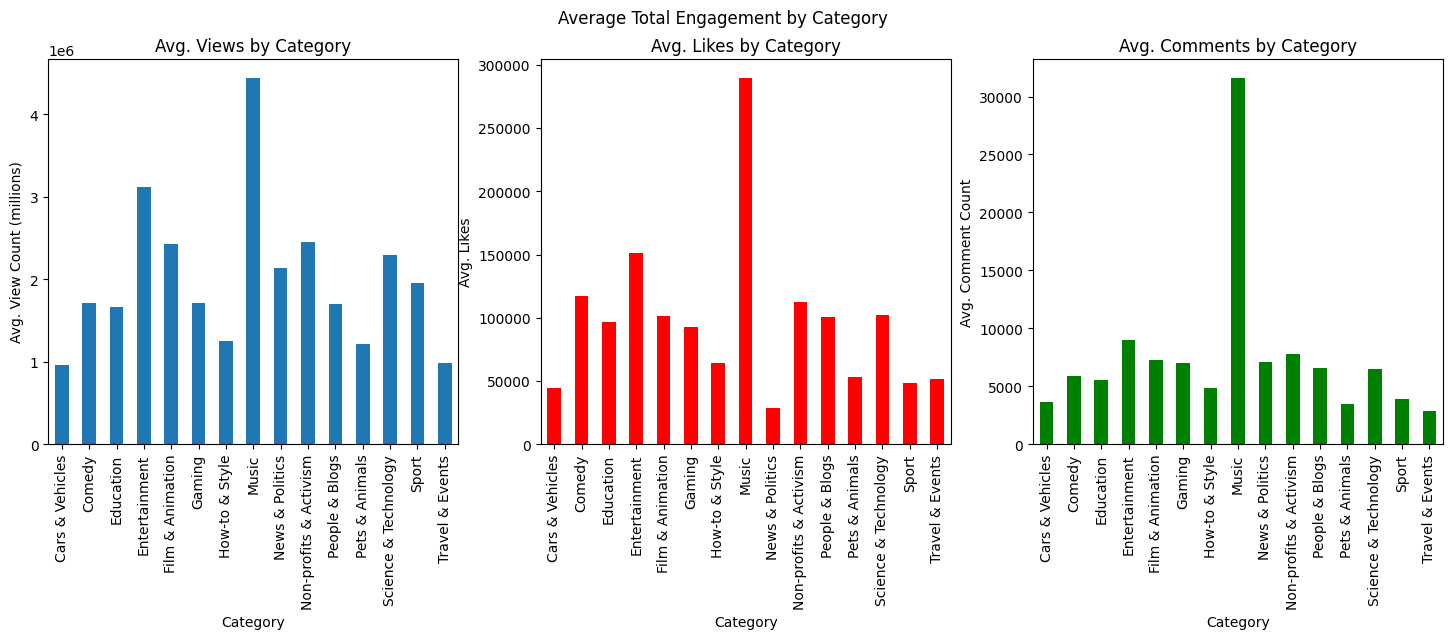

In [12]:
# plot the data from the previous cell
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Average Total Engagement by Category")
fig.set_figheight(5)
fig.set_figwidth(18)

viewsByCategory.plot(kind = 'bar', title='Avg. Views by Category', ylabel = 'Avg. View Count (millions)', xlabel='Category', ax=ax1);
likesByCategory.plot(kind = 'bar', title='Avg. Likes by Category', ylabel = 'Avg. Likes', xlabel='Category', ax=ax2, color='red');
commentsByCategory.plot(kind = 'bar', title='Avg. Comments by Category', ylabel = 'Avg. Comment Count', xlabel='Category', ax=ax3, color='green');

### Music videos have the highest absolute engagement of any category by far. But do music videos have the highest relative engagement?

#### Meaning are music videos still geting likes and comments relative to the number of video views?

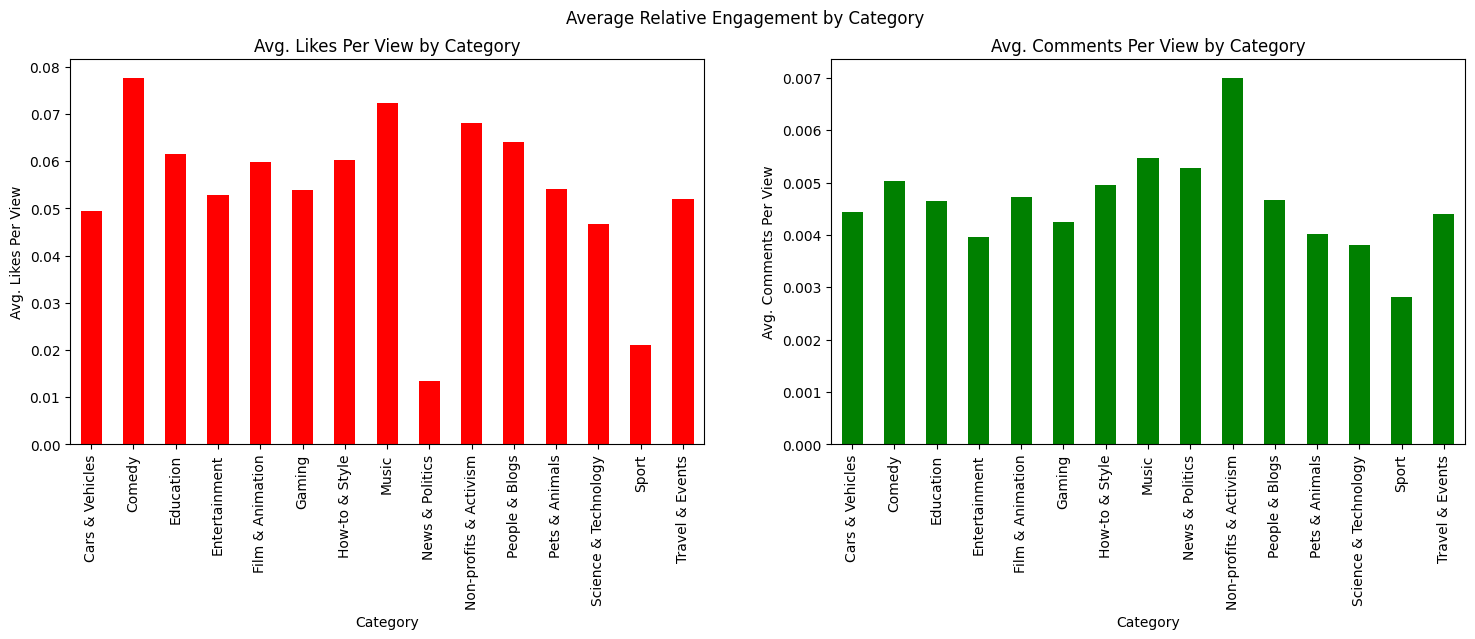

In [13]:
# plot likes and comment per view
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Average Relative Engagement by Category")
fig.set_figheight(5)
fig.set_figwidth(18)


lpvByCategory = likesEnabled.groupby(['categoryName'])['likesPerView'].mean()
cpvByCategory = commentsEnabled.groupby(['categoryName'])['commentsPerView'].mean()

lpvByCategory.plot(kind = 'bar', title='Avg. Likes Per View by Category', ylabel = 'Avg. Likes Per View', xlabel='Category', ax=ax1, color='red');
cpvByCategory.plot(kind = 'bar', title='Avg. Comments Per View by Category', ylabel = 'Avg. Comments Per View', xlabel='Category', ax=ax2, color='green');

### Notice the disparity between the likes and comments per view of the 'News & Politics' category. This indicates that viewers of News on YouTube are more likely to comment than to like. The opposite goes for the majority of other categories, like Comedy.

### Also note that music no longer has substantially more comments or likes than the other categories. 

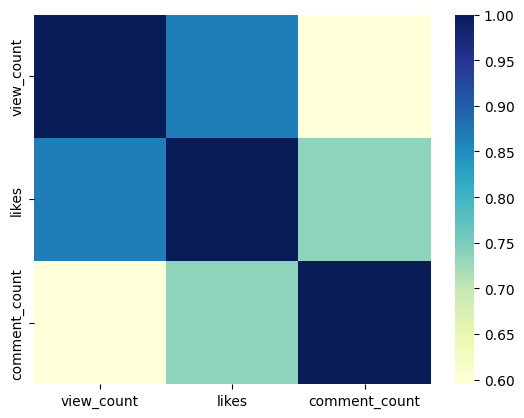

In [14]:
# check for correlation between the metrics
correlation = dataNothingDisabled[['view_count', 'likes', 'comment_count']].corr()

sns.heatmap(correlation, cmap ='YlGnBu');

### Correlation is high across the categories, as is expected

## Does time of year or day of the week affect video views?

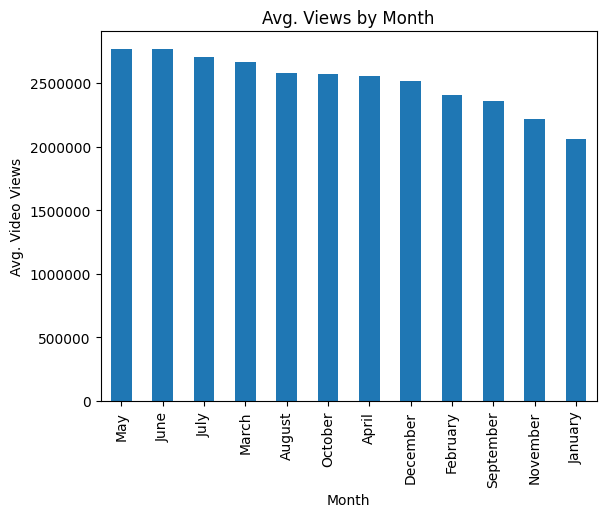

In [15]:
# month of the year
viewsByMonth = dataNothingDisabled.groupby(['month'])['view_count'].mean()
viewsByMonth = viewsByMonth.sort_values(ascending=False)

plt.ticklabel_format(style='plain')
viewsByMonth.plot(kind = 'bar', title='Avg. Views by Month', ylabel = 'Avg. Video Views', xlabel='Month');


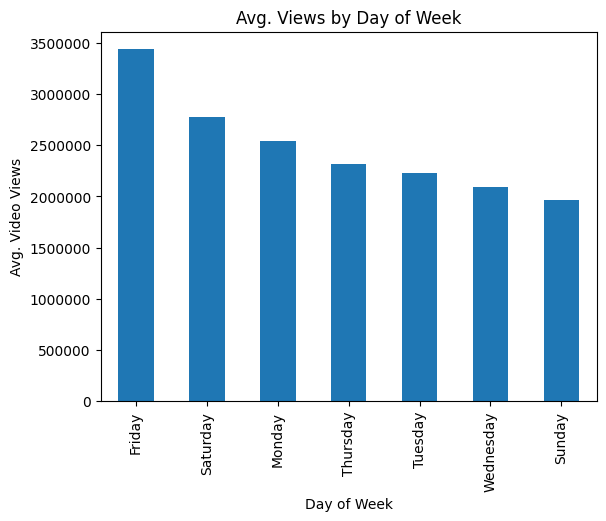

In [16]:
# day of week
viewsByWeekday = dataNothingDisabled.groupby(['weekday'])['view_count'].mean()
viewsByWeekday = viewsByWeekday.sort_values(ascending=False)

plt.ticklabel_format(style='plain')
viewsByWeekday.plot(kind = 'bar', title='Avg. Views by Day of Week', ylabel = 'Avg. Video Views', xlabel='Day of Week');

### Videos on average get more views in the summer months and on Fridays

## Which channels have had the most trending videos?

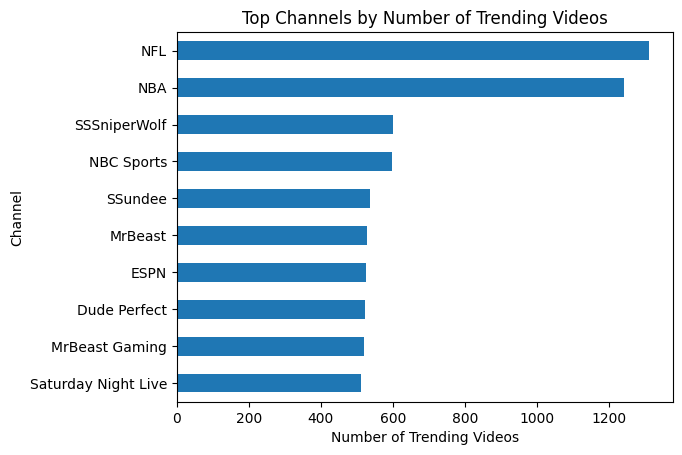

In [17]:
# top channels 
channels = dataNothingDisabled.groupby(['channelTitle'])['channelId'].count()
channels = channels.sort_values(ascending=True)

channels[-10:].plot(kind = 'barh', title='Top Channels by Number of Trending Videos', ylabel = 'Channel', xlabel='Number of Trending Videos');

## How have trends changed over the past couple of years in terms of what people are viewing?

In [18]:
# views by category over time 
viewTrends = dataNothingDisabled.groupby(['year', 'categoryName'])['view_count'].mean()
viewTrends = pd.DataFrame(viewTrends).reset_index()

## find the categories with the biggest change in views from 2020 to 2023
# keep only the first and last year data
viewTrends = viewTrends.loc[(viewTrends['year'] == 2020) | (viewTrends['year'] == 2023)]

# take the difference
viewTrends['diff'] = abs(viewTrends['view_count'].sub(viewTrends['view_count'].shift(15)))

# keep only the top 5
biggestChangers = viewTrends.sort_values('diff', ascending = False).head(n=4)

# view what the top 5 categories are
biggestChangersList = list(biggestChangers['categoryName'])
biggestChangersList.append('Non-profits & Activism')
biggestChangersList

['Gaming',
 'Film & Animation',
 'Science & Technology',
 'Travel & Events',
 'Non-profits & Activism']

In [19]:
# create a dataframe with only those categories
greatestChanges = dataNothingDisabled.groupby(['year', 'categoryName'])['view_count'].mean().reset_index()

greatestChanges = greatestChanges.loc[greatestChanges['categoryName'].isin(biggestChangersList)]

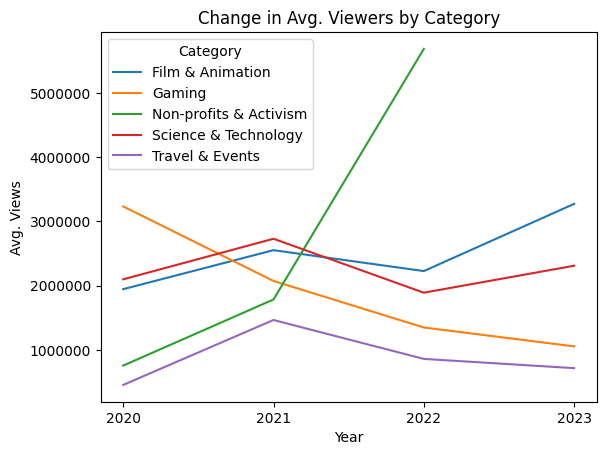

In [20]:
# plot the findings
change = sns.lineplot(x='year', y= 'view_count', hue='categoryName', data=greatestChanges)
change.set(xticks=[2020, 2021, 2022, 2023], ylabel='Avg. Views', xlabel='Year', title='Change in Avg. Viewers by Category');
change.legend(title='Category');
change.ticklabel_format(style='plain')

### Non-proft videos have shot up in popularity since 2020, whereas gaming videos have taken a dip in viewership